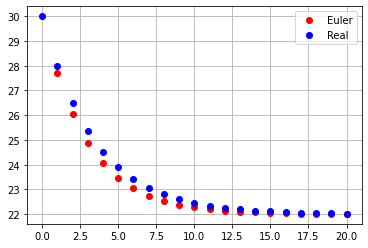

In [32]:
import math
from pylab import *
global k
global T
def f(x,y): 
    global k
    global T
    return -k*(y-T) # Funcion de EDO

def y(x):
    global k
    global T
    return (8 * math.e**(-k*x))+22 # SoluciÃ³n exacta EDO con PVI


def euler(f,x,y,h,m):
    u=[]
    v=[]
    for i in range(m):
        y = y+h*f(x,y)
        x = x+h
        u = u+[x]
        v = v+[y]
    return [u,v]
k = 0.2877
T = 22
[u,v] = euler(f,0,30,1,20)
plot(u,v,'or', label="Euler")

x = arange(0,21,1)
plot(x,y(x),'ob', label="Real")
grid(True)
legend(loc='upper right')
show()


Los parametros de la regresión lineal 
w = [ 0.00000000e+00 -2.10112381e+00  2.30194167e-01 -1.12794779e-02
  2.04729115e-04], b = 29.491864855687144


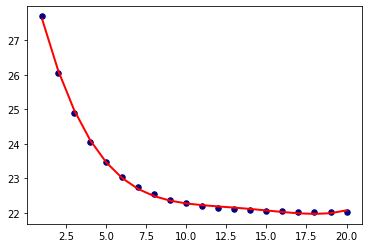

0.0002047291150462094 x**4 + -0.01127947785834782 x**3 + 0.2301941669079785 x**2 + -2.101123814410511 x + 29.491864855687144


In [26]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
##### Datos experimentales #############
## pueden ser  x: los datos del número de iteraciones y y: la solución o el error #####
x= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
y= np.array([27.6984, 26.05897032, 24.891204558936, 24.059405007330113, 23.46691418672124, 23.04488297520154, 22.744270143236054, 22.53014362302704, 22.37762130268216, 22.268979653900505, 22.19159420747333, 22.136472553983253, 22.09720940020227, 22.069242255764077, 22.049321258780754, 22.03513153262953, 22.025024190692015, 22.017824731029922, 22.012696555912612, 22.009043756776553])

# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
###### usaremos polinomios de grado 2  ###############
pf = PolynomialFeatures(degree = 4) 
####### transformamos la entrada en polinómica ######
X = pf.fit_transform(x.reshape(-1,1))  
####### creamos una instancia de LinearRegression ######
regresion_lineal = LinearRegression() 
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y) 
# vemos los parámetros que ha estimado la regresión lineal
#### Los parametros vienen ordenados como w = [0 , A x, B x^2], b ==> b + Ax +Bx^2
print("Los parametros de la regresión lineal ")
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
coef=regresion_lineal.coef_

f=coef[-1]*x**4+coef[-2]*x**3+coef[-3]*x**2+coef[-4]*x+regresion_lineal.intercept_


# importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
####### Genera los datos para la curva amarilla que se ajusta a los datos experimentales ############
prediccion_entrenamiento = regresion_lineal.predict(X)
############ Graficamos los datos experimentales ##########################################
plt.scatter(x, y, color='navy', s=30, marker='o')
############ Graficamos los datos de entrenamiento (modelo ajustado, curva amarilla) ##########
plt.plot(x,prediccion_entrenamiento, color='red', linewidth=2)
######################### Agregamos y mostramos leyendas ##########################
plt.show()
print(coef[-1],"x**4 +",coef[-2],"x**3 +",coef[-3],"x**2 +",coef[-4],"x +",regresion_lineal.intercept_)

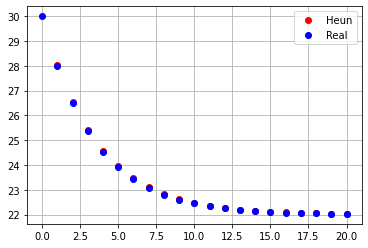

In [52]:
import math
from pylab import *
global k
global T
def f(x,y): 
    global k
    global T
    return (-k*(y-T)) # Funcion de EDO

def y(x):
    global k
    global T
    return (8 * math.e**(-k*x))+T # Solución exacta EDO con PVI

def heun(f,x,y,h,m):
    u=[]
    v=[]
    for i in range(m):
        k1 = h*f(x,y)
        k2 = h*f(x+h,y+k1)
        y = y+0.5*(k1+k2)
        x = x+h
        u = u+[x]
        v = v+[y]
        
    return [u,v]
k = 0.2877
T = 22
[u,v] = heun(f,0,30,1,20)
plot(u,v,'or', label="Heun")
x = arange(0,21,1)
plot(x,y(x),'ob', label="Real")
grid(True)
legend(loc='upper right')
show()


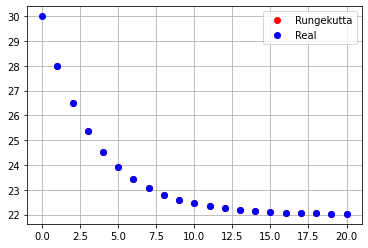

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[28.000017788638754, 26.500026682997685, 25.375030018416894, 24.531280018461395, 23.898465642349276, 23.423853453151896, 23.067893255915763, 22.800922316482744, 22.600693518276778, 22.450521474397583, 22.337892107568656, 22.25341983200657, 22.19006543750416, 22.142549500753795, 22.106912442535542, 22.08018456963001, 22.0601386055193, 22.045104087862466, 22.03382816618939, 22.02537119986167]


In [33]:
import math
from pylab import *
global k
global T
def f(x,y): 
    global k
    global T
    return (-k*(y-T)) # Funcion de EDO

def y(x):
    global k
    global T
    return (8 * math.e**(-k*x))+T # Solución exacta EDO con PVI

def rungekutta(f,x,y,h,m):
    u=[]
    v=[]
    for i in range(m):
        k1 = h*f(x,y)
        k2 = h*f(x+h/2,y+k1/2)
        k3 = h*f(x+h/2,y+k2/2)
        k4 = h*f(x+h,y+k3)
        y = y+1/6*(k1+2*k2+2*k3+k4)
        x = x+h
        u = u+[x]
        v = v+[y]
        
    return [u,v]
k = 0.2877
T = 22
[u,v] = rungekutta(f,0,30,1,20)
plot(u,v,'or', label="Rungekutta")
x = arange(0,21,1)
plot(x,y(x),'ob', label="Real")
grid(True)
legend(loc='upper right')
show()
print(u)
print(v)

Los parametros de la regresión lineal 
w = [ 0.00000000e+00 -1.92573622e+00  1.95041001e-01 -9.07070604e-03
  1.59049536e-04], b = 29.681977329226942


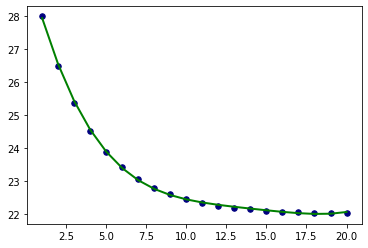

0.00015904953601708627 x**4 + -0.009070706043670468 x**3 + 0.19504100138831287 x**2 + -1.9257362186663451 x + 29.681977329226942


In [38]:
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import*
import numpy as np
##### Datos experimentales #############
## pueden ser  x: los datos del número de iteraciones y y: la solución o el error #####
x= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
y= np.array([28.000017788638754, 26.500026682997685, 25.375030018416894, 24.531280018461395, 23.898465642349276, 23.423853453151896, 23.067893255915763, 22.800922316482744, 22.600693518276778, 22.450521474397583, 22.337892107568656, 22.25341983200657, 22.19006543750416, 22.142549500753795, 22.106912442535542, 22.08018456963001, 22.0601386055193, 22.045104087862466, 22.03382816618939, 22.02537119986167])

# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression 
# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures 
###### usaremos polinomios de grado 2  ###############
pf = PolynomialFeatures(degree = 4) 
####### transformamos la entrada en polinómica ######
X = pf.fit_transform(x.reshape(-1,1))  
####### creamos una instancia de LinearRegression ######
regresion_lineal = LinearRegression() 
# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y) 
# vemos los parámetros que ha estimado la regresión lineal
#### Los parametros vienen ordenados como w = [0 , A x, B x^2], b ==> b + Ax +Bx^2
print("Los parametros de la regresión lineal ")
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))
coef=regresion_lineal.coef_

f=coef[-1]*x**4+coef[-2]*x**3+coef[-3]*x**2+coef[-4]*x+regresion_lineal.intercept_


# importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
####### Genera los datos para la curva amarilla que se ajusta a los datos experimentales ############
prediccion_entrenamiento = regresion_lineal.predict(X)
############ Graficamos los datos experimentales ##########################################
plt.scatter(x, y, color='navy', s=30, marker='o')
############ Graficamos los datos de entrenamiento (modelo ajustado, curva amarilla) ##########
plt.plot(x,prediccion_entrenamiento, color='green', linewidth=2)
######################### Agregamos y mostramos leyendas ##########################
plt.show()
print(coef[-1],"x**4 +",coef[-2],"x**3 +",coef[-3],"x**2 +",coef[-4],"x +",regresion_lineal.intercept_)